### IDs:
Insert yours IDs to the cell below

ID #1: 203909320

ID #2: 311132468


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from scipy import stats, optimize
import warnings
warnings.filterwarnings('ignore')

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [2]:
boston = load_boston()
boston_frame = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_frame["target"] = boston.target


####    Concerns housing values in suburbs of Boston.

Number of Instances: 506

bNumber of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

     Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1.0 if tract bounds 
                 river; 0.0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000$
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. target   Median value of owner-occupied homes in $1000's - ##Added by us##


In [3]:
boston_frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
boston_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [5]:
boston_frame.shape

(506, 14)

In [6]:
boston_frame.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

### 2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.

Text(0.5, 1.0, 'boxplot of the nitric oxides concentration')

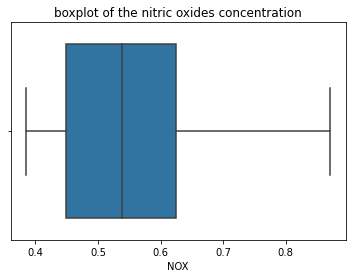

In [7]:
sns.boxplot(x=boston_frame["NOX"])
plt.title("boxplot of the nitric oxides concentration")

Text(0.5, 1.0, 'histogram of the nitric oxides concentration')

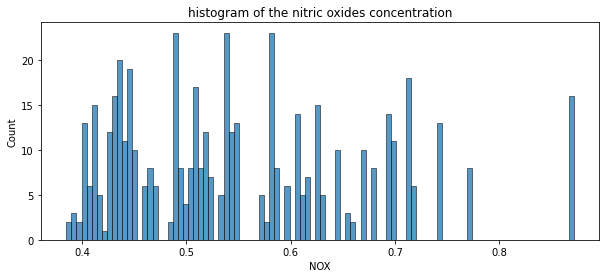

In [8]:
plt.figure(figsize=(10,4))
sns.histplot(x=boston_frame["NOX"],bins = 100)
plt.title("histogram of the nitric oxides concentration")

As can be seen from the boxplot and histogram above, we see that 25% to 75% of the nitric oxides has the concentration levels of 0.449 to 0.624. the median is 0.538 and the mean is 0.55.
in terms of distribution we can see a big rise from the count of 0.4 nitric oxide concentration to the count of 0.44 and then a then a decay of some sort . its hard to say which distribution the histogram might imply because the "rise and falls" arent consistent to spot some sort of mathematical behaviour.

In [9]:
boston_frame.NOX.describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

### 3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

In [10]:
boston_frame.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5, 1.0, 'correlation matrix')

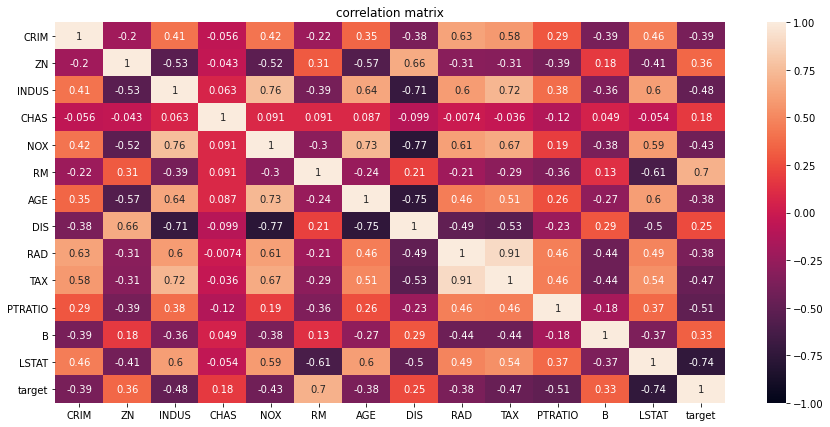

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(boston_frame.corr(), vmin=-1, vmax=1,annot=True)
plt.title('correlation matrix')

Now, lets suggest to look at all of the features with correlation ratio bigger than 0.6 or smaller than -0.6 and well see if we can spot significan correlation:

In [12]:
df = boston_frame.corr()
a =  df > 0.6
b = df < -0.6
c = df < 1
df = df[a | b]
df = df [c]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,NaN,NaN,NaN,NaN,NaN
ZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,NaN,NaN,0.763651,NaN,0.644779,-0.708027,NaN,0.720760,NaN,NaN,0.603800,NaN
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,NaN,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.613808,0.695360
AGE,NaN,NaN,0.644779,NaN,0.731470,NaN,NaN,-0.747881,NaN,NaN,NaN,NaN,0.602339,NaN
DIS,NaN,0.664408,-0.708027,NaN,-0.769230,NaN,-0.747881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAD,0.625505,NaN,NaN,NaN,0.611441,NaN,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.720760,NaN,0.668023,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN,NaN


As seen in the heatmap of the correlation matrix: we can spot that 4 features correlates with each other either negativly or positivly and they are: DIS, AGE, NOX and INDUS the DIS.
furthermore, TAX feature correlates really high with RAD (accessibility to radial highways) which is really interesting finding.


### 4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 

In [13]:
df.max().max()
# TAX - RAD produce the highest positive correlation 

0.9102281885331822

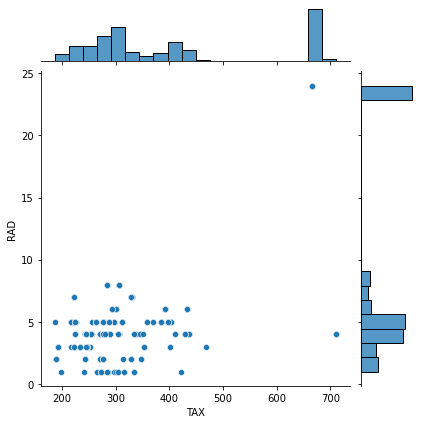

In [14]:
sns.jointplot(x=boston_frame['TAX'], y=boston_frame['RAD'], marginal_kws=dict(bins=20))

In [15]:
df.min().min()
# DIS - NOX produce the highest negative correlation 

-0.7692301132258261

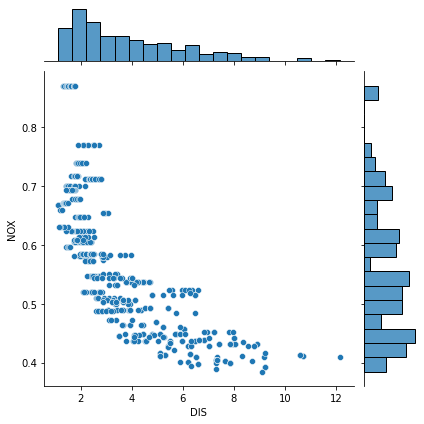

In [16]:
sns.jointplot(x=boston_frame['DIS'], y=boston_frame['NOX'], marginal_kws=dict(bins=20))

### 5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

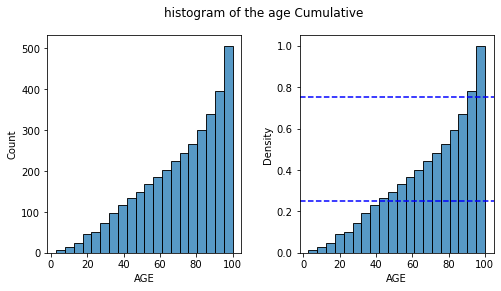

In [17]:
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col',figsize=(8,4));
plt.suptitle ('histogram of the age Cumulative')
plt.subplots_adjust(wspace = 0.3)
sns.histplot(x=boston_frame["AGE"],bins = 20,cumulative= True,stat = "count",ax=ax1)
sns.histplot(x=boston_frame["AGE"],bins = 20,cumulative= True,stat = "density",ax=ax2)
#compute quartile
plt.axhline(0.25, color='b', linestyle='--')
plt.axhline(0.75, color='b', linestyle='--')

### 6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

we identified two interesting trends regarding the target price attribute we added:
1. LSTAT (% lower status of the population) - one can expect to a high target price where the precentage of the lower population is low. it is indeed reflected in the data, and presented in the plot. 
2. CRIM (crime rate by town) - one can expect for a high crime rate in a place with low target price and it is indeed reflected in the data, and presented in the plot.


the trend line shows predicted target price based on each feature 

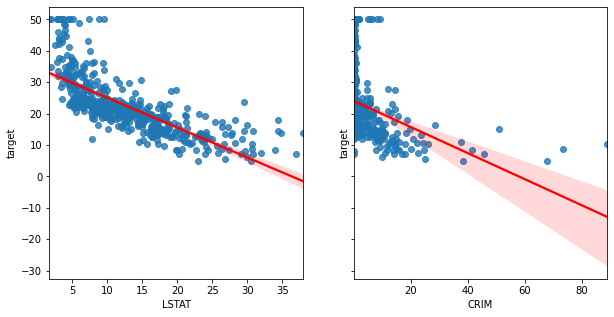

In [18]:
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(10,5));
sns.regplot(x = "LSTAT",y = "target",data = boston_frame, line_kws={'color': 'red'},ax=ax1)
sns.regplot(x = "CRIM",y = "target",data = boston_frame, line_kws={'color': 'red'},ax=ax2)

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

#### 2.A answer

Assume we have an X vector which follows:
$$X = (x_1,x_2,x_3,...,x_n)∼N(μ,Σ) $$

where $Σ \in M^{nxn}$ represent the covariance squared matrix with n dimensions

and the pdf is given as:

$$ p(x_1,...,x_n) = {\frac{1}{\sqrt{(2\pi)^n |Σ|}}\large e^{\frac{-1}{2}(X-μ)^TΣ^{-1}(X-μ)}} $$

now we know that we have pairwise - independent thus the covariance matrix $Σ$ becomes diagonal:
$$
Σ_{n,n} = 
 \begin{pmatrix}
  \sigma_{1,1}^2 & 0 & \cdots & 0 \\
  0 & \sigma_{2,2}^2 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & \sigma_{n,n}^2 
 \end{pmatrix}
 $$
and we will represent $μ$ as: $$ μ = (μ_1,μ_2,...,μ_n)$$
now, applying determinent on a diagonal matrix produces the following: $$\large det(Σ_{n,n}) = \Pi_{i=1}^{n} \sigma_{i,i}^2 $$
inserting the values of $Σ$ inside the pdf gives us: 
$$ p(x_1,...,x_n) = {\Large\Pi_{i=1}^{n}}{\frac{1}{\sqrt{(2\pi)\sigma_i^2}}\large e^{{\Large-\frac{1}{{\Large 2\sigma_i^2}}(X_i-μ_i)^T(X_i-μ_i)}}} $$
now lets rearrange it again: 
$$ p(x_1,...,x_n) = {\Large\Pi_{i=1}^{n}}{\frac{1}{\sqrt{(2\pi)\sigma_i^2}}\large e^{{\Large-\frac{1}{{\Large 2\sigma_i^2}}(X_i-μ_i)^2}}} $$
as written above we get that due to pairwise independent conditions, our pdf now is from the form of: $$ p(x_1,...,x_n) = p(x_1)\cdot p(x_2)\cdot...\cdot p(x_n)$$

**which states that pairwise independent three dimensional multivariate gaussian is by nature collectivley independent as well**

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

#### 2.B answer
the total possible values are: $n\cdot m \cdot k$
but nevertheless, the necessary parameters number to define the joint distributions is $$n\cdot m \cdot k -1$$ 
##### explanation: 
because the sum of all probabilities is ought to be 1, hence the last parameter can be derived from sum of probabilities reduced by  $n\cdot m \cdot k$.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

#### 2.C answer
the total possible values of the joint distributions are defined by $n+ m + k$, but with the independence information we can reduce the number of parameters by 1 for each random variable, due to additional knowledge about the parameters hence:
$$(n-1)+ (m-1) + (k-1)$$

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

#### 2.D answer
the total possible values of the joint distributions are defined by $(n+m)\cdot k$, but with the independence information and the fact that the probabilities sum up tp 1 we can reduce the number of parameters :
$$k\cdot ((n-1) +(m-1)) -1$$

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

### 2.E Answer

following that $X$ and $Y$ are conditionaly independent given $Z$
$$\forall a,b,c : P(X=a,Y=b|Z=c)=P(X=a|Z=c)P(Y=b|Z=c)$$
two coins with probabilities p and q of obtaining Heads, and we randomly choose one of them (denote the choice by X) and
flip it twice to obtain Y1, Y2, then Y1, Y2 are conditionally independent given X. 

for example: 2 coins: One fair coin with {T,H} ,Second coin {H,H}: biased and unfair
* $X$ = first toss result is: {H}
* $Y$ = Second toss result is: {H}
* $Z$ = coin 1 has been selected

$P(a|c)=P(b|c)=\frac{1}{2} \rightarrow$ 
coin 1 has been selected: $$P(a\cap b|c)=\frac{1}{2}\cdot \frac{1}{2}=\frac{1}{4}$$
$\forall a,b,c$: $X$ and $Y$ conditionaly independent given $Z$ if: $$P(X=a,Y=b|Z=c)=P(a|c)\cdot P(b|c) =P(a\cap b|c)=\frac{1}{4}$$;

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

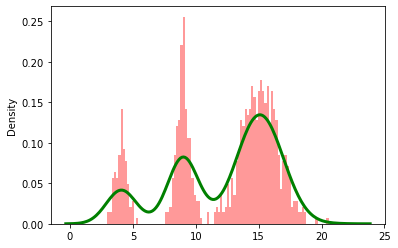

In [19]:
GMD = pd.read_csv('GMD_2021.csv', header = None, index_col = 0, squeeze = True)
sns.distplot(x=GMD,bins = 100,kde_kws={"color": "g", "lw": 3, "label": "KDE"},hist_kws={"color": "red"})

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### first estimatiom method - EM

In [20]:
sigma = np.array([0.5,0.5,1.5]) #sigma_3 initial guess is 1.5
miu = np.array([4,9,5]) #miu_3 initial guess is 15
w = np.array([0.3,0.25,0.45]) #w_1 initial guess is 0.3, w_3 initial guess is 0.45 
print(" sigma: ",sigma,"\n\n\n","miu: ",miu,"\n\n\n","w: ",w)

 sigma:  [0.5 0.5 1.5] 


 miu:  [4 9 5] 


 w:  [0.3  0.25 0.45]


In [21]:
def respo(x,k,w,miu,sigma): # K runs from 1 to 3
#     print(w[k-1],miu[k-1],sigma[k-1])
    numerator = w[k-1] * stats.norm.pdf(x,miu[k-1],sigma[k-1])
    denominator = 0
    for j in range(3):
        denominator+= w[j] * stats.norm.pdf(x,miu[j],sigma[j])
    if denominator ==0:
        return None
    return numerator / denominator 

In [22]:
def calc_log_like(x,w,miu,sigma): #calculating the log likelihood for a pandas series
    val = 0
    for j in range(3):
        val+= w[j] * stats.norm.pdf(x,miu[j],sigma[j])
    return np.log(val)

In [23]:
from tqdm import tqdm_notebook as tqdm #adding a nice progress bar to know when the loop is finished
def calc_parm_em(GMD,w,miu,sigma, iter_num = 10):
    data = { 'X': GMD.copy(), 'r_1': GMD.copy(), 'r_2': GMD.copy(), 'r_3': GMD.copy(), 'log_lik': GMD.copy() } 
    em = pd.DataFrame(data) #initialize the data
    log_like = {}
    em.log_lik = em.log_lik.apply(calc_log_like,w=w,miu=miu,sigma=sigma) # first iteration log likelihood
    log_like.update({0: em.log_lik.sum()})
    for i in tqdm(range(iter_num)):
        #first calculate responsibilities - sort them as a dataframe where first column is X and the rest are r_i's
        #using pandas apply function - sweet stuff!
        em.r_1 = em.X.apply(respo,k=1,w=w,miu=miu,sigma=sigma)
        em.r_2 = em.X.apply(respo,k=2,w=w,miu=miu,sigma=sigma)
        em.r_3 = em.X.apply(respo,k=3,w=w,miu=miu,sigma=sigma)
        w[0] = em.iloc[:,1].sum() / em.X.size
        w[2] = em.iloc[:,3].sum() / em.X.size
        miu[2] = (em.X * em.iloc[:,3]).sum()/(em.X.size*w[2])
        #sigma[j] = np.sqrt((em.iloc[:,j+1] * ((em.X - miu[j])**2)).sum()/(em.X.size*w[j]))
#       print("iteration{0}\n :omega{1}\n sigma{2}\n miu{3}\n".format(i+1,w,sigma,miu))
        em.log_lik = em.X.apply(calc_log_like,w=w,miu=miu,sigma=sigma)
        log_like.update({i+1: em.log_lik.sum()})
    ax = plt.axes()
    ax.plot([item for item in log_like.keys()],[item for item in log_like.values()])
    plt.xticks(np.arange(0, iter_num, 1))
    ax.set(xlabel='Iteration', ylabel='log likelihood',title='Log likelihood over iteration')
    return w,miu,sigma,log_like


w_1 is : 0.1250
w_3 is 0.6252
miu_3 is 15.1011

In total:

 Sigma is: [0.5 0.5 1.5] 
 Miu is: [ 4.          9.         15.10105914] 
 w is: [0.125      0.25       0.62518878]
 sum of w is: 1.0001887797192301


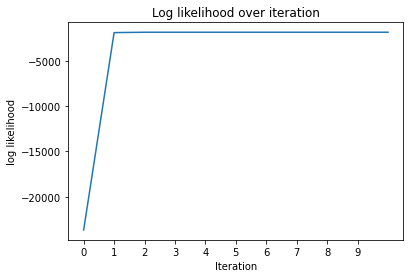

In [24]:
sigma = np.array([0.5,0.5,1.5]) #sigma_3 initial guess is 1.5
miu = np.array([4,9,1]).astype(float) #miu_3 initial guess is 1
w = np.array([0.5,0.25,0.5]) #w_1 initial guess is 0.5, w_3 initial guess is 0.5
w,miu,sigma,log_like = calc_parm_em(GMD,w,miu,sigma,iter_num = 10)
print("w_1 is : {0:.4f}\nw_3 is {1:.4f}\nmiu_3 is {2:.4f}".format(w[0],w[2],miu[2]))
print("\nIn total:\n")
print(" Sigma is:",sigma,"\n","Miu is:",miu,"\n","w is:",w)
print(" sum of w is: {0}".format(w.sum()))

#### second estimatiom method - solving unlinear system of equations

the unlinear system of equations will be of this type:
$$1)\space w_1+w_2+w_3 = 1$$
$$2)\space \mu_{GMM} = w_1\cdot\mu_1  + w_2\cdot\mu_2  + w_3\cdot\mu_3$$
$$3)\space \sigma^2_{GMM} = w_1\cdot\sigma_1^2 + w_2\cdot\sigma_2^2 + w_3\cdot\sigma_3^2 + w_1\cdot(\mu_1-\mu)^2 + w_2\cdot(\mu_2-\mu)^2 + w_3\cdot(\mu_3-\mu)^2$$

In [25]:
sigma = np.array([0.5,0.5,1.5]) #sigma_3 initial guess is 1.5
miu = np.array([4,9,15]) #miu_3 initial guess is 15
w = np.array([0.3,0.25,0.45]) #w_1 initial guess is 0.3, w_3 initial guess is 0.45 
from scipy.optimize import fsolve
def func(x): #x[0] = w_1 , x[1] = w_3 , x[2] = miu_3
    sigma = np.array([0.5,0.5,1.5]) #sigma_3 initial guess is 1.5
    miu = np.array([4,9,15]) #miu_3 initial guess is 15
    w = np.array([0.3,0.25,0.45]) #w_1 initial guess is 0.3, w_3 initial guess is 0.45 
    data_mean = 12.19884308211053
    data_var = 17.591027829588853
    return [x[0] +x[1]+ w[1] - 1, x[0]*miu[0]+w[1]*miu[1]+x[1]*x[2] - data_mean,  x[0]*(sigma[0]**2)+w[1]*(sigma[1]**2)+x[1]*(sigma[2]**2)+x[0]*((miu[0]-data_mean)**2)+w[1]*((miu[1]-data_mean)**2)+x[1]*((x[2]-data_mean)**2)- data_var]
w_1,w_3,miu_3 = fsolve(func, [0.3, 0.45,15])
w[0] = w_1
w[2] = w_3
miu[2] = miu_3
print("w1 is : {0:.4f}\nw_3 is {1:.4f}\nmiu_3 is {2:.4f}".format(w_1,w_3,miu_3))
print("\nIn total:\n")
print(" Sigma is:",sigma,"\n","Miu is:",miu,"\n","w is:",w)
print(" sum of w is: {0}".format(w.sum()))

w1 is : 0.1234
w_3 is 0.6266
miu_3 is 15.0894

In total:

 Sigma is: [0.5 0.5 1.5] 
 Miu is: [ 4  9 15] 
 w is: [0.12338231 0.25       0.62661769]
 sum of w is: 1.0


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

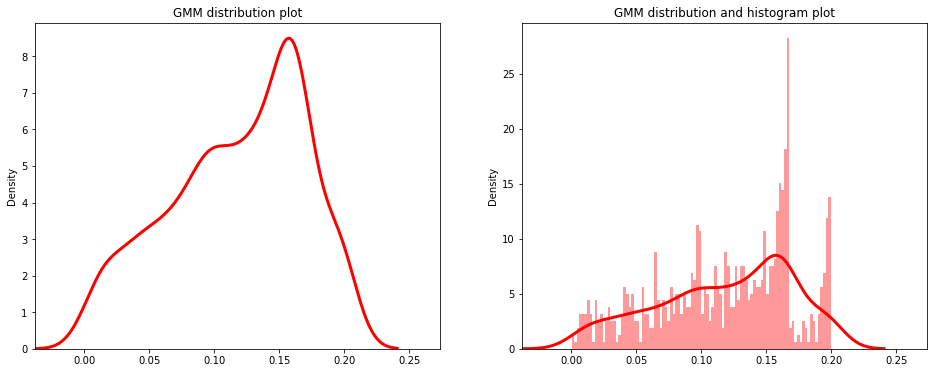

In [26]:
def gmm_pdf(GMD,w,miu,sigma):
    gmm = np.zeros((800))
    for i in range(GMD.size):
        gmm[i]=(w[0] * stats.norm.pdf(GMD[i],miu[0],sigma[0]) + w[1] * stats.norm.pdf(GMD[i],miu[1],sigma[1]) +w[2] * stats.norm.pdf(GMD[i],miu[2],sigma[2]))
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.distplot(gmm,ax=ax[0],bins = 100,hist=False,kde_kws={"color": "red", "lw": 3, "label": "KDE"},hist_kws={"color": "red"})
    sns.distplot(gmm,ax=ax[1],bins = 100,kde_kws={"color": "red", "lw": 3, "label": "KDE"},hist_kws={"color": "red"})
    ax[0].set_xlim(xmin= gmm.mean()-3*gmm.std() , xmax= gmm.mean()+3*gmm.std())
    ax[1].set_xlim(xmin= gmm.mean()-3*gmm.std() , xmax= gmm.mean()+3*gmm.std())
    ax[0].set_title('GMM distribution plot')
    ax[1].set_title('GMM distribution and histogram plot')
gmm_pdf(GMD,w,miu,sigma)

#### we chose the limits of X to be $X \in [\mu - 3\sigma, \mu +3\sigma]$ to get the 99.7% of the data in the plot

#### 3.C
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1+3, \mu_2+5, \mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

First: Generate 3 normal distributions with chosen parametric size N.
#### First approach - concatenation:
* Concatenate the 3 data arrays to create a  $Gmm_c$ data array.

#### Second approach - random Pick:
create an empty data array $Gmm$ to assign the gmm data into.

iterate over the size of the distributions - N and do:
* generate uniformly a probability $p$.
  * if $ p<0.33$ then randomly pick a value $x$ from the first generated normal distribution
  * if $ 0.33\leq p<0.66$ then randomly pick a value $y$ from the second generated normal distribution
  * if $ 0.66\leq p \leq 1$ then randomly pick a value $z$ from the thirs generated normal distribution
* append to $Gmm$ the chosen value $x$ or $y$ or $z$.

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


Text(0.5, 1.0, 'First Approach - Concatenation')

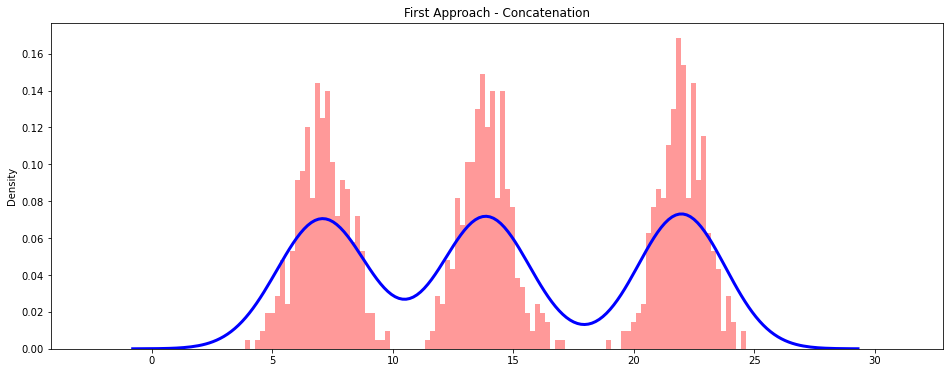

In [27]:
miu = np.array([4+3,9+5,15+7])
sigma = 1
w = 0.33
first_gaussian = stats.norm.rvs(loc=miu[0], scale=sigma, size=333)
second_gaussian = stats.norm.rvs(loc=miu[1], scale=sigma, size=333)
third_gaussian = stats.norm.rvs(loc=miu[2], scale=sigma, size=334)
Gmm_c = np.concatenate([first_gaussian, second_gaussian,third_gaussian])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(Gmm_c, bins=100,kde_kws={"color": "b", "lw": 3, "label": "KDE"},hist_kws={"color": "red"})
plt.xlim(xmin= Gmm_c.mean()-3*Gmm_c.std() , xmax= Gmm_c.mean()+3*Gmm_c.std())
ax.set_title('First Approach - Concatenation')

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


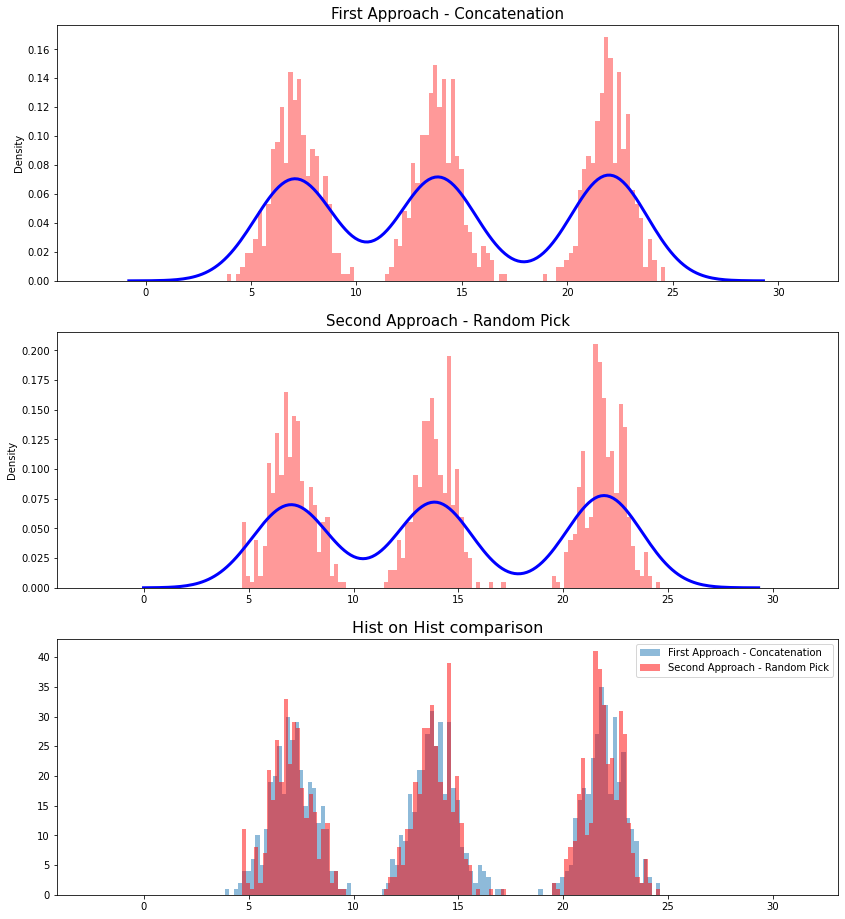

In [28]:
Gmm = np.zeros(1000)
for i in range(1000):
    p = stats.uniform.rvs(size=1)
    if p < 0.33:
        Gmm[i] = np.random.choice(a=first_gaussian, size=1)
    elif p>=0.33 and p < 0.66:
        Gmm[i] = np.random.choice(a=second_gaussian, size=1)
    else:
        Gmm[i] = np.random.choice(a=third_gaussian, size=1)
# plotting the comparative GMM and GMM_c
fig, ax = plt.subplots(3, 1, figsize=(14, 16))
sns.distplot(Gmm_c, ax=ax[0],bins=100,kde_kws={"color": "b", "lw": 3, "label": "KDE"},hist_kws={"color": "red"})
ax[0].set_title('First Approach - Concatenation', fontdict={'fontsize': 15})
ax[0].set_xlim(xmin= Gmm_c.mean()-3*Gmm_c.std() , xmax= Gmm_c.mean()+3*Gmm_c.std())
sns.distplot( Gmm, ax=ax[1],bins=100,kde_kws={"color": "b", "lw": 3, "label": "KDE"},hist_kws={"color": "red"})
ax[1].set_title('Second Approach - Random Pick', fontdict={'fontsize': 15})
ax[1].set_xlim(xmin= Gmm.mean()-3*Gmm.std() , xmax= Gmm.mean()+3*Gmm.std())
ax[2].hist(Gmm_c, alpha = 0.5 , bins=100, label="First Approach - Concatenation")
ax[2].hist(Gmm, alpha = 0.5 , bins=100, label="Second Approach - Random Pick",color ="r")
ax[2].set_xlim(xmin= Gmm.mean()-3*Gmm.std() , xmax= Gmm.mean()+3*Gmm.std())
ax[2].set_title('Hist on Hist comparison',fontsize = 16)
ax[2].legend()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

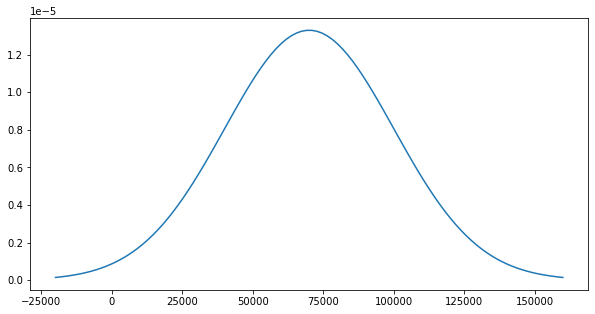

In [29]:
miu = 70000
sigma = 30000
x = np.linspace(miu - 3*sigma, miu + 3*sigma, 100)
plt.subplots(figsize=(10, 5))
plt.plot(x, stats.norm.pdf(x, miu, sigma))

#### 4.A
What percent of people earn less than 50,000 RCU?

In [30]:
print("{0:.2f}% of the people, earn less than 50,000 RCU".format(100*stats.norm.cdf((50000-miu)/sigma, loc=0, scale=1)))


25.25% of the people, earn less than 50,000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [31]:
z_65 = (65000-miu)/sigma
z_45 = (45000-miu)/sigma
num= 100*(stats.norm.cdf(z_65, loc=0, scale=1)-stats.norm.cdf(z_45, loc=0, scale=1))
print("{0:.2f}% of the people, earn between 45,000 RCU and 65,000 RCU".format(num))

23.15% of the people, earn between 45,000 RCU and 65,000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

In [32]:
100*(1-stats.norm.cdf(0, loc=0, scale=1))
print("{0:.2f}% of the people, earn more than 70,000 RCU".format(100*(1-stats.norm.cdf(0, loc=0, scale=1))))

50.00% of the people, earn more than 70,000 RCU


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [33]:
np.floor(1000*(1-stats.norm.cdf((140000-miu)/sigma, loc=0, scale=1)))

9.0

In [34]:
print("We expect {0:.0f} employees to earn more than 140,000 RCU".format(np.floor(1000*(1-stats.norm.cdf((140000-miu)/sigma, loc=0, scale=1)))))

We expect 9 employees to earn more than 140,000 RCU


#### 4.E
<span style="color:red"> This question was slightly updated due to a subtlety in the phrasing </span>

A survey is performed on employees of the company. **20 groups of 50 employees each are sampled (with replacenets).**
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [35]:
z_70 = (70000-miu)/(sigma/np.sqrt(50))
z_50 = (50000-miu)/(sigma/np.sqrt(50))
p_sample = stats.norm.cdf(z_70, loc=0, scale=1)-stats.norm.cdf(z_50, loc=0, scale=1)
prob = 1 - stats.binom.cdf(10,20,p_sample)
print("We get a probability of *{0:.4f}* that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU ".format(prob))

We get a probability of *0.4119* that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU 


$$P = 0.4119$$

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### 5.A Answer
we recall that the time distributes geometrically and As we saw, $\large p = \frac{N-i+1}{N}$ and $\large E(T_N) =\frac{1}{p} = N\cdot H_N$ where $H_N$ is the Harmonic series so we'll write a code which computes the harmonic sum

In [36]:
def expect_coupon(n):
    return sum([1/i for i in range(1,n+1)]) * n
print("E(N=2) = {0}".format(expect_coupon(2))) # easy case which the expactation should be equals to 3

E(N=2) = 3.0


#### 5.B
Write code to compute the exact value of $V(T_{N})$

$$V(T_i) = \frac{1-p}{p^2} = \frac{1-\frac{N-i+1}{N}}{(\frac{N-i+1}{N})^2} = \frac{\frac{i-1}{N}}{(\frac{N-i+1}{N})^2} = N\cdot \frac{i-1}{(N-i+1)^2}   $$

$$ \large V(T_N) =N\cdot \sum_{i=1}^{N} \frac{i-1}{(N-i+1)^2}$$


In [37]:
def var_coupon(n):
    return sum([(i-1)/((n-i+1)**2) for i in range(1,n+1)]) * n
print("Var(N=2) = {0}".format(var_coupon(2))) # easy case which the variance should be equals to 2

Var(N=2) = 2.0


#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [38]:
def coupon_calc(N,Z):
    p_t = np.array([(N-i+1)/N for i in range(2,21)]) # first value will be a null case 1, we'll skip it
    trials = np.arange(1,Z+1)
    p_x = np.array([stats.geom.pmf(trials, item) for item in p_t]) #getting the fully probabilities for N for the trials
    s = np.zeros(p_x[0].shape); s[0] = 1 #first value represents P(T_1 = 1) which is 1 and the rest are 0
    for item in p_x: #apply convolution
        s = np.convolve(s,item) 
    cdf = s[:Z-N +1].sum()
    return 1-cdf # we are asked P(T_20 > 40) which is  1 - P(T_20 < 40)
print("P(T_20>40) = {0:.4f}".format(coupon_calc(20,40)))  

P(T_20>40) = 0.9641


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

Tchebysheff's theorem: Suppose X is any random variable with mean $\mu$ and standard deviation $\sigma$ then:
$$ \forall b>0 \rightarrow \large P(\mu - b\sigma \leq X \leq \mu +  b\sigma)\geq 1 - \frac{1}{b^2}$$
and we can extract b by absolute value: $$ |\frac{X-\mu}{\sigma}| \leq b $$

In [39]:
X = 40
mu = expect_coupon(20)
sig = var_coupon(20)**0.5
b = np.abs((X-mu)/sig)
print(" RV is {0} \n Mean is {1:.3f}\n Sigma is {2:.3f}\n b is {3:.3f}".format(X,mu,sig,b))

 RV is 40 
 Mean is 71.955
 Sigma is 23.801
 b is 1.343


In [40]:
print("Tchebysheff's Bound is: {0:.4f}".format(1-1/(b**2)))

Tchebysheff's Bound is: 0.4452


it is shown that Tchebysheff's Bound $P(T_{20} > 40)$ by 0.44 . it is not a tight bound for the calculated result $P(T_{20} > 40) = 0.9641$  and it is as expected because Tchebysheff's theorem is true to any kind of distribution, so it emits a weak lower bound but still  emits a correct one.